In [85]:
import pandas as pd
import re
import folium
from folium import plugins
from japanmap import pref_names
import matplotlib.pyplot as plt
from japanmap import picture
import numpy as np
import matplotlib as mpl
mpl.rcParams['font.family'] = 'AppleGothic'

In [86]:
class Corona:
    """
    コロナのマップを表示する関数を保持する
    """
    
    def __init__(self, csv_name, title, save_csv_name=None):
        """
        Parameters
        ----------
        csv_name : str
            CSVファイル名
            
        title : str
            表のタイトル
            
        save_csv_name : int
            保存するCSVファイル名
        """
        self.data = pd.read_csv(csv_name)
        self.save_csv_name = save_csv_name
        self.day = title
        self.title = title + "のコロナ感染者マップ"
        self.group_data = None
        self.preprocessing() # データの前処理
        self.group_area() # 居住地ごとにグルーピング
        
    def preprocessing(self):
        """
        データの前処理
        """
        self.data['*居住地*']=self.data["*居住地*"].map(lambda x: re.sub(r"[/*,※]", "", x))
        for i in self.data.index:
            if '中国' in self.data.loc[i, '*居住地*']:
                self.data = self.data.drop(i, axis=0)
            elif '調査中' in self.data.loc[i, '*居住地*']:
                self.data = self.data.drop(i, axis=0)
                
    def group_area(self):
        """
        居住地ごとにデータを纏める
        
        Returns
        -------
        group_data : dataframe
            居住地のグルーピングしたデータ
        """
        self.group_data = self.data[['*居住地*','*新No.*']].groupby('*居住地*').count()
        return self.group_data
    
    def fig_display(self):
        """
        感染者の表の表示
        """
        cmap = plt.get_cmap('Reds')
        norm = plt.Normalize(vmin=0, vmax=self.group_data['*新No.*'].max())
        plt.colorbar(plt.cm.ScalarMappable(norm, cmap))
        fcol = lambda x: '#' + bytes(cmap(norm(x), bytes=True)[:3]).hex()
        plt.imshow(picture(self.group_data['*新No.*'].apply(fcol)));
        plt.title(self.title)
        if self.save_csv_name:# 前処理済みのCSVを保存する場合
            plt.savefig(self.save_csv_name)
        
    def get_infection_prefecture(self, prefecture_name):
        """
        県別の感染者数を取得
        
        Returns
        -------
        prefecture_name : str
            県の名前
        """
        infection_prefecture =  self.group_data.loc[prefecture_name][0]
        print("{prefecture_name}の感染者数は{day}時点で{infection_prefecture}人です。".format(prefecture_name=prefecture_name,day=self.day,infection_prefecture=infection_prefecture))

In [87]:
name = "korona0227.csv"
title = "02/27木曜日"
corona0227 = Corona(name, title)

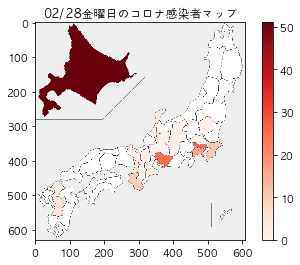

In [88]:
corona.fig_display()

In [89]:
corona0227.get_infection_prefecture('栃木県')

栃木県の感染者数は02/27木曜日時点で1人です。


In [90]:
corona0227.get_infection_prefecture('北海道')

北海道の感染者数は02/27木曜日時点で36人です。


In [91]:
name = "korona0226.csv"
save_csv_name = "corona0226.png"
title = "02/26水曜日"
corona0226 = Corona(name, save_csv_name, title)

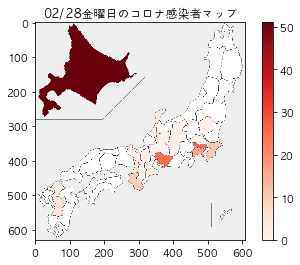

In [92]:
corona.fig_display()

In [93]:
name = "korona0225.csv"
save_csv_name = "corona0225.png"
title = "02/25水曜日"
corona0225 = Corona(name, save_csv_name, title)

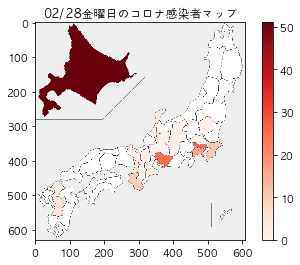

In [94]:
corona.fig_display()

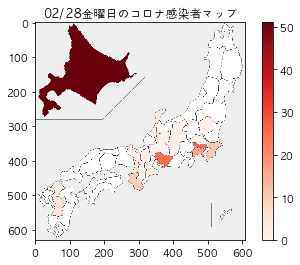

In [95]:
name = "japanease.csv"
save_csv_name = "corona0221.png"
title = "02/21水曜日"
corona0221 = Corona(name, save_csv_name, title)
corona.fig_display()

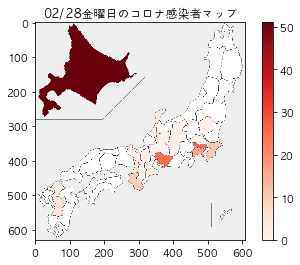

In [97]:
name = "korona0228.csv"
title = "02/28金曜日"
save_csv_name = "corona0228"
corona = Corona(name, title, save_csv_name)
corona.fig_display()